In [118]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [119]:
df = pd.read_csv("DSU-W21-Personality/cleaned_youngpeople_data.csv")

In [120]:
df = df[['Gender', 'PC' , 'Action',  'Romantic', 'War', 'Sci-fi']]

In [121]:
df = df.dropna()
df

,Gender,PC,Action,Romantic,War,Sci-fi
0,female,3,2,4,1,4
1,female,4,4,3,1,4
2,female,2,1,2,2,4
3,female,1,2,3,3,4
4,female,2,4,2,3,3
...,...,...,...,...,...,...
972,female,3,4,5,2,4
973,male,5,5,1,5,5
974,female,4,3,5,1,2
975,female,4,4,3,2,1


C:\Users\eduon\anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  after removing the cwd from sys.path.


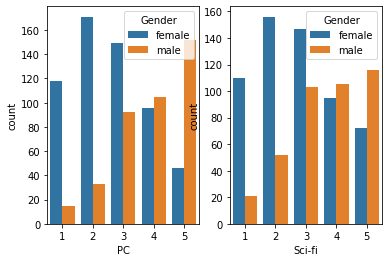

In [122]:
fig, ax = plt.subplots(1,2)
sns.countplot(df['PC'], hue=df["Gender"], ax = ax[0])
sns.countplot(df['Sci-fi'], hue=df["Gender"], ax = ax[1])
fig.show()

#sns.countplot(df['Gender'])

C:\Users\eduon\anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  after removing the cwd from sys.path.


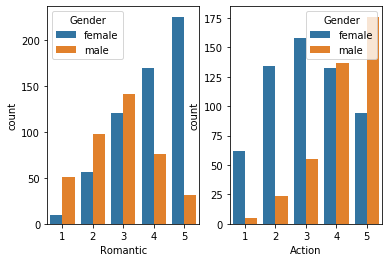

In [123]:
fig, ax = plt.subplots(1,2)
sns.countplot(df['Romantic'], hue=df["Gender"], ax = ax[0])
sns.countplot(df['Action'], hue=df["Gender"], ax = ax[1])
fig.show()

In [124]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df[['PC', 'War', 'Action', 'Romantic', 'Sci-fi']], 
                                                    df['Gender'], test_size=0.2)

In [125]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [126]:
model.score(X_test, y_test)

0.8571428571428571

In [127]:
y_predicted = model.predict(X_test)

In [128]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predicted)
cm

array([[110,  10],
       [ 18,  58]], dtype=int64)

Text(69.0, 0.5, 'Truth')

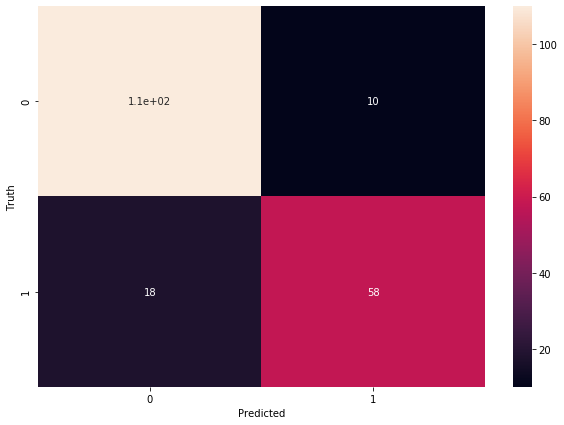

In [129]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')
# On Average, the data seems to underestimate how much people will spend on looks

In [130]:
from sklearn.linear_model import SGDClassifier
model = SGDClassifier(max_iter=5000)
model.fit(X_train, y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=5000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [131]:
model.score(X_test, y_test)

0.8061224489795918

In [132]:
y_predicted = model.predict(X_test)

In [133]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predicted)
cm

array([[117,   3],
       [ 35,  41]], dtype=int64)

Text(69.0, 0.5, 'Truth')

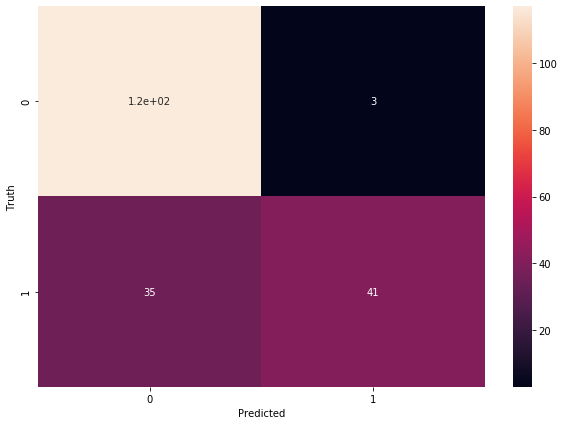

In [134]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')
# On Average, the data seems to underestimate how much people will spend on looks